# Deno: node, but better

![](snow_den.png)

art: Arc-blroth - https://github.com/Arc-blroth


# Why Deno?

<iframe width="420" height="315"
src="https://www.youtube.com/embed/M3BM9TB-8yA">
</iframe> 

- Node async is bad (no promises)
- Security (access to all syscalls)
- Build System (gyp)
- package.json (boilerplate)
- node_modules (too complex)
- require without extension
- index.js (unnecessary)

# Features

- Typescript support (`deno check`)
- lint support (`deno lint`)
- format support (`deno fmt`)
- test support (`deno test`)
- no config
- backward compatible with node
- Web standard APIs
- std library
- async await support
- permissions
- cross compilation
- ...


https://youtu.be/H8VLifMOBHU

# Batteries included

![image.png](./alternatives-node.png)
![image.png](./alternatives-deno.png)

# Examples

Hello world:

`deno run https://docs.deno.com/examples/scripts/hello_world.ts`

https://docs.deno.com/examples/

In [5]:
console.log("%c Hello LTT", "background-color: red")

 Hello LTT


In [2]:
try {
  const data = await Deno.readTextFile("../deno.jsonc");
  console.log(data);
} catch (err) {
  console.error(err);
}

{
  "workspace": ["./demo", "./wasm", "./utils"]
}



In [2]:
import { penguins } from "jsr:@ry/jupyter-helper";

const p = await penguins();

Deno.jupyter.html`${p.head(10).toHTML()}`

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18,195,3250,FEMALE
Adelie,Torgersen,NaN,NaN,NaN,NaN,null
Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
Adelie,Torgersen,39.3,20.6,190,3650,MALE
Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
Adelie,Torgersen,39.2,19.6,195,4675,MALE
Adelie,Torgersen,34.1,18.1,193,3475,null
Adelie,Torgersen,42,20.2,190,4250,null


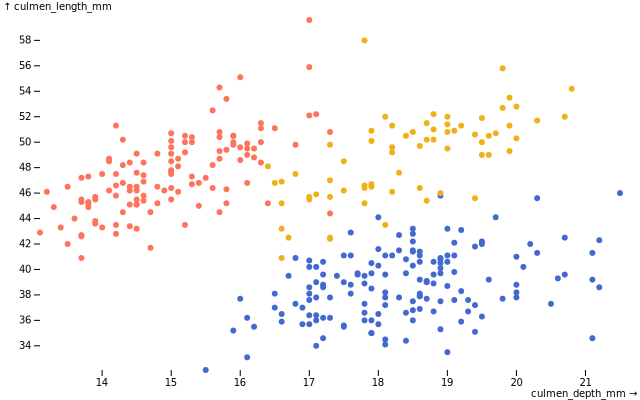

In [14]:
import { document } from "jsr:@ry/jupyter-helper";
import * as Plot from "npm:@observablehq/plot";

Plot.plot({
  marks: [
    Plot.dot(p.toRecords(), {
      x: "culmen_depth_mm",
      y: "culmen_length_mm",
      fill: "species",
    }),
  ],
  document,
});


# Compatible with node/npm

```ts
import chalk from "npm:chalk";
import { relative } from "node:path";
```

`deno install`

`deno add/remove`

Works either with deno.json or package.json.

Very clean deno.lock.

`deno outdated (--update)`

![timings](./package-install-timings.png)

# Permissions

- --allow-read, -R
- --allow-write, -W
- --allow-net
- --allow-env
- --allow-run
- --allow-all, -A

# (Cross) compilation

`deno compile --allow-read --allow-net jsr:@std/http/file-server`

### Cross compile for Windows with an icon

`deno compile --target x86_64-pc-windows-msvc --icon ./icon.ico main.ts`

# JSR

https://jsr.io/

The open-source package registry for modern JavaScript and TypeScript.

- Native TypeScript support
- ECMAScript modules only
- Cross-runtime support
- JSR is a superset of npm

Great DX. Just `deno publish` typescript sources and JSR will take care of everything (doc, types defs, etc)

https://jsr.io/docs/why

You can see the TS source of packages!

# Standard library

https://docs.deno.com/runtime/reference/deno_namespace_apis/

https://jsr.io/@std

In [ ]:
import {sortBy} from "jsr:@std/collections"

const shape = [{width: 12}, {width: 2}, {width: 122}]
sortBy(shape, s => s.width);

[ { width: 2 }, { width: 12 }, { width: 122 } ]

In [3]:
import {permutations} from "jsr:@std/collections";

permutations([1,2,3])

[
  [ 1, 2, 3 ],
  [ 2, 1, 3 ],
  [ 3, 1, 2 ],
  [ 1, 3, 2 ],
  [ 2, 3, 1 ],
  [ 3, 2, 1 ]
]

In [5]:
import { delay, retry } from "jsr:@std/async";
import { randomIntegerBetween } from "jsr:@std/random";

await retry(
  async () => {
    await delay(10);
    console.log("try...");
    if (randomIntegerBetween(1, 2) !== 2) throw Error("Nope");
  },
  {
    maxAttempts: 3,
  },
);
console.log("Yeah");


try...
Yeah


In [4]:
import { debounce, delay, deadline } from "jsr:@std/async";
import { randomIntegerBetween } from "jsr:@std/random";

function* randomChar() {
    while (true) {
        delay(10);
        yield randomIntegerBetween(97, 122).toString()
    }
}

const debounced = debounce(() => randomChar(), 100);
// const deadlined = deadline(debounced, 1000);

In [1]:
import { instantiate } from "../wasm/lib/rs_lib.generated.js";

const { add, hello } = await instantiate();

console.log(add(1, 2));
hello();

3


# Workspaces

```
$ deno task --recursive dev
Task dev deno run -RN build.ts
Task dev deno run -RN server.ts
Bundling project...
Listening on http://localhost:8000/
Project bundled
```

```
$ deno task --filter "client/" dev
Task dev deno run -RN build.ts
Bundling project...
Project bundled
```

https://docs.deno.com/runtime/fundamentals/workspaces/

# Tests

https://docs.deno.com/runtime/fundamentals/testing/#documentation-tests

`deno test --doc example.ts`

You can typecheck (`deno check`) and execute code (`deno test`) in documentation: jsdoc or markdown files!

Living documentation FTW.

# Rusty V8

Chrome moved on from GYP years ago.

https://deno.com/blog/rusty-v8-stabilized

# Create a react app with vite and Deno

`deno run -A npm:create-vite-extra`

# Fresh!

https://fresh.deno.dev/


```
deno run -A -r https://fresh.deno.dev
cd fresh-project
deno task start
```